In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
class LinearRegression:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)

              
        for i in range(epochs):
            
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            
            
            
        return self.W, self.b

    def predict(self, X):
#         print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product
    
    

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")
df.head(200)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
195,Male,72.294743,208.474866
196,Male,67.253325,180.779780
197,Male,75.944460,231.924749
198,Male,66.316232,170.593858


In [35]:
# feature engineering?
x = (df['Weight']-df['Weight'].mean())/df['Weight'].std() #standardization of the dataset
y = (df["Height"]-df['Height'].mean())/df["Height"].std()
x.shape, y.shape

((10000,), (10000,))

In [36]:
reg = LinearRegression(n_features=1)

[0.9247563] -2.5449634271283853e-16


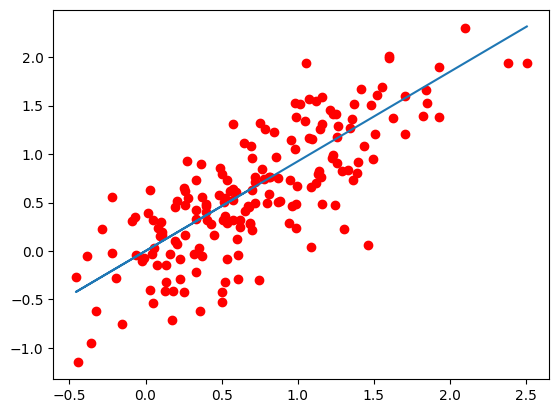

In [37]:
params = reg.train(x, y, epochs=20000, learning_rate=0.3)
print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [12]:
def foo(w, b, n):
    x = np.random.rand(n,1)
    y = np.power(2, (w*x)) + b
    return x, y

x, y = foo(9, 3, 25000)
x.shape, y.shape

((25000, 1), (25000, 1))

In [13]:
reg = LinearRegression(n_features=1)

[334.85512135] -82.53127907366984


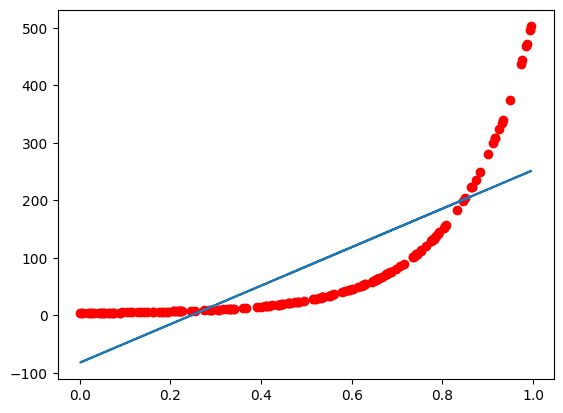

In [14]:
params = reg.train(x, y, epochs=500, learning_rate=0.225)
print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])